# 동규형의 테스트 파일로 읽어서 자이로 분석을 해봅시다

In [4]:
import pandas as pd

# 데이터 불러오기
# X축은 좌우 / Y축은 앞뒤 / Z축은 동체 자체의 회전
df = pd.read_csv("./data/gyro/test_gyr.csv")


# df 전처리 time컬럼 및 첫번째 행 삭제
# df.drop(['time'], axis=1, inplace=True)
df.drop(0, axis=0, inplace=True)



# str을 뉴머릭으로!
df['X_value'] = pd.to_numeric(df['X_value'])
df['Y_value'] = pd.to_numeric(df['Y_value'])
df['Z_value'] = pd.to_numeric(df['Z_value'])

df.info()

# 각 컬럼의 평균을 알아봅시다.
print("X축 평균 : ", df['X_value'].mean())
print("X축 표준편차 : ", df['X_value'].std())
print("Y축 평균 : ", df['Y_value'].mean())
print("Y축 표준편차 : ", df['Y_value'].std())
print("Z축 평균 : ", df['Z_value'].mean())
print("Z축 표준편차 : ", df['Z_value'].std())



# 전부 정규화시켜봅시다.
# 정규화 함수
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

scale_columns = ['X_value', 'Y_value', 'Z_value']
data = standard_scaling(df, scale_columns)

display(data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 1 to 417
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     417 non-null    object 
 1   X_value  417 non-null    float64
 2   Y_value  417 non-null    float64
 3   Z_value  417 non-null    float64
dtypes: float64(3), object(1)
memory usage: 16.3+ KB
X축 평균 :  -0.2606274820143887
X축 표준편차 :  10.63405244430133
Y축 평균 :  4.40487932853717
Y축 표준편차 :  11.16836773435136
Z축 평균 :  15.427481270983215
Z축 표준편차 :  21.66005762396059


,time,X_value,Y_value,Z_value
1,0.0000,0.024509,-0.394407,-0.712255
2,0.0006,0.024509,-0.394407,-0.712255
3,0.0305,0.048286,-0.356780,-0.712450
4,0.0642,0.086110,-0.344654,-0.711993
5,0.0981,0.083086,-0.348169,-0.712714
...,...,...,...,...
413,13.9689,0.571581,0.421105,-0.683188
414,14.0036,0.580805,0.431205,-0.680302
415,14.0376,0.576214,0.430351,-0.682022
416,14.0706,0.488686,0.503869,-0.683274


In [5]:
# 변화량을 만들어보자 -> X Y Z

variance_list = []

for i in range (len(data)):
    try :
        variance = data.iloc[i+1,1] - data.iloc[i,1]
        variance_list.append(abs(variance))
    except :
        variance_list.append(0)
        
data['X변화량'] = variance_list


variance_list2 = []
for i in range (len(data)):
    try :
        variance2 = data.iloc[i+1,2] - data.iloc[i,2]
        variance_list2.append(abs(variance2))
    except :
        variance_list2.append(0)
        
data['Y변화량'] = variance_list2


variance_list3 = []
for i in range (len(data)):
    try :
        variance3 = data.iloc[i+1,3] - data.iloc[i,3]
        variance_list3.append(abs(variance3))
    except :
        variance_list3.append(0)
        
data['Z변화량'] = variance_list3

display(data)

,time,X_value,Y_value,Z_value,X변화량,Y변화량,Z변화량
1,0.0000,0.024509,-0.394407,-0.712255,0.000000,0.000000,0.000000
2,0.0006,0.024509,-0.394407,-0.712255,0.023777,0.037627,0.000195
3,0.0305,0.048286,-0.356780,-0.712450,0.037824,0.012126,0.000457
4,0.0642,0.086110,-0.344654,-0.711993,0.003024,0.003515,0.000721
5,0.0981,0.083086,-0.348169,-0.712714,0.003932,0.006114,0.001469
...,...,...,...,...,...,...,...
413,13.9689,0.571581,0.421105,-0.683188,0.009224,0.010101,0.002885
414,14.0036,0.580805,0.431205,-0.680302,0.004591,0.000854,0.001720
415,14.0376,0.576214,0.430351,-0.682022,0.087527,0.073517,0.001252
416,14.0706,0.488686,0.503869,-0.683274,0.001425,0.035824,0.012871


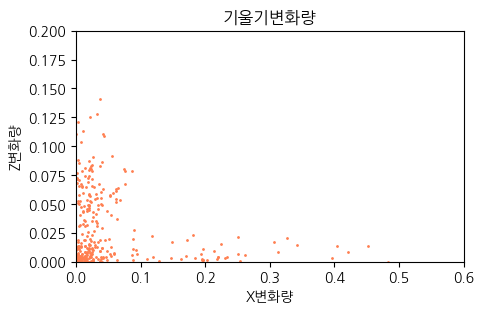

In [7]:
# 군집분석을 어떻게 할 것인가? -> 산점도부터 그려보자!!
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 먼저 AX변화량과 AY변화량을 찾아내 X값과 Y값으로 준다음 산점도를 그려보자
plt.style.use('default')

data.plot(kind='scatter', x='X변화량', y='Z변화량', c='coral', s=1, figsize=(5,3))
plt.xlim(0, 0.6)
plt.ylim(0, 0.2)
plt.title('기울기변화량')
plt.show()


# 한쪽에 몰려있긴 하지만, 양의 상관관계를 가진다는 것을 유추할 수 있음
# 즉 X축 변화량이 클 때, Z축 변화량도 커짐 (반대로 생각할 수도 있음) 

In [10]:
# 군집분석 전 yellow brisks 테스트~

# 데이터 확보
data1 = data[['X변화량', 'Z변화량']]
data2 = data[['X변화량', 'Y변화량','Z변화량']]

KElbowVisualizer(ax=<AxesSubplot:>, k=None, model=None)

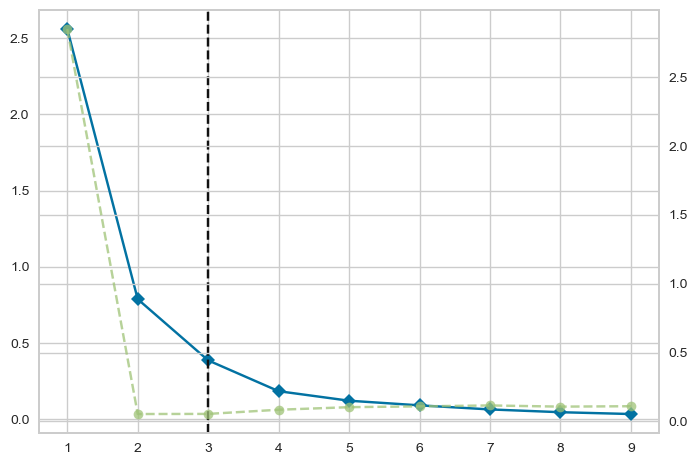

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd


data1 = data1.to_numpy()

from yellowbrick.cluster import KElbowVisualizer
 
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data1.reshape(-1,1))

[[-0.51350793 -0.59400769 -0.70371533]
 [-0.18323708  0.11546012 -0.69686768]
 [ 0.01186894 -0.36536331 -0.68766717]
 [-0.47150077 -0.52772564 -0.67838553]
 [-0.45889601 -0.47873162 -0.65208213]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

<AxesSubplot:xlabel='X변화량', ylabel='Z변화량'>

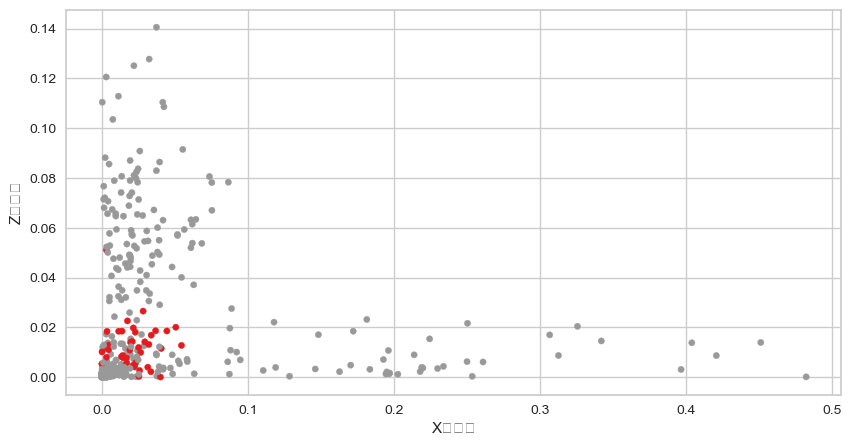

In [11]:
### 군집분석을 해보자 ### 

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import cluster


# # 모형 준비
x = data2.iloc[:, :]
x = preprocessing.StandardScaler().fit(x).transform(x)
# print(x[:5])

# display(x)

# # 모형 객체 생성
kmeans = cluster.KMeans(init='k-means++', n_clusters=2, n_init=10)

# # 모형 학습
kmeans.fit(x)

# # 예측(군집)
cluster_label = kmeans.labels_
# print(cluster_label)

# # 예측결과를 데이터베이스에 입력
data2['군집'] = cluster_label
# display(df.head(5))

# 그래프로 표현 - 시각화
data2.plot(kind='scatter', x='X변화량', y='Z변화량', c='군집', cmap='Set1', colorbar=False, figsize=(10,5), legend=True)


# 박성준 테스트 파일로 읽어봅시다.

In [34]:
import pandas as pd

df = pd.read_csv("./data/gyro/자이로센서.txt", encoding="utf-8", sep=",")

df.columns = ['SamplingTime', 'AccelerationX', 'AccelerationY', 'AccelerationZ', 'GyroX', 'GyroY', 'GyroZ', 'MagneticFieldX', 'MagneticFieldY', 'MagneticFieldZ']
df.drop(df.columns[[0,7,8,9]], axis=1, inplace=True)
df.drop([236, 237], axis=0, inplace=True)


# str을 뉴머릭으로!
df['AccelerationX'] = pd.to_numeric(df['AccelerationX'])
df['AccelerationY'] = pd.to_numeric(df['AccelerationY'])
df['AccelerationZ'] = pd.to_numeric(df['AccelerationZ'])
df['GyroX'] = pd.to_numeric(df['GyroX'])
df['GyroY'] = pd.to_numeric(df['GyroY'])
df['GyroZ'] = pd.to_numeric(df['GyroZ'])


# display(df)
df.info()


print("X축 평균 :", df['AccelerationX'].mean())
print("X축 표준편차 :",df['AccelerationX'].std())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 235
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AccelerationX  236 non-null    float64
 1   AccelerationY  236 non-null    float64
 2   AccelerationZ  236 non-null    float64
 3   GyroX          236 non-null    float64
 4   GyroY          236 non-null    float64
 5   GyroZ          236 non-null    float64
dtypes: float64(6)
memory usage: 12.9 KB
X축 평균 : -0.39155345338983044
X축 표준편차 : 4.059345863708313


In [36]:
def outlier_dect(sample1, sample2) :
    try : 
        if abs(sample1 - sample2) > 1.5 :
            print("야이 음식 다 뒤집어지겠다.")
        else :
            print("안전주행하세요")
    except : 
        print("끝이지롱")
        
for i in range(len(df)):
    outlier_dect(df.iloc[i+1,0],df.iloc[i,0])

안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
야이 음식 다 뒤집어지겠다.
안전주행하세요
야이 음식 다 뒤집어지겠다.
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
야이 음식 다 뒤집어지겠다.
야이 음식 다 뒤집어지겠다.
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
야이 음식 다 뒤집어지겠다.
야이 음식 다 뒤집어지겠다.
야이 음식 다 뒤집어지겠다.
야이 음식 다 뒤집어지겠다.
야이 음식 다 뒤집어지겠다.
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
야이 음식 다 뒤집어지겠다.
야이 음식 다 뒤집어지겠다.
야이 음식 다 뒤집어지겠다.
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
야이 음식 다 뒤집어지겠다.
야이 음식 다 뒤집어지겠다.
야이 음식 다 뒤집어지겠다.
야이 음식 다 뒤집어지겠다.
야이 음식 다 뒤집어지겠다.
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요
안전주행하세요


IndexError: single positional indexer is out-of-bounds

,"1;""gyro_xout"";""gyro_yout"";""gyro_zout"";""accel_xout"";""accel_yout"";""accel_zout"""
0,"1287;""-15"";""299"";""115"";""-1428"";""-980"";""15920"""
1,"1288;""-215"";""354"";""2"";""-1308"";""-1024"";""15760"""
2,"1289;""968"";""344"";""243"";""-1376"";""-948"";""16024"""
3,"1290;""1733"";""328"";""239"";""-1104"";""-668"";""16132"""
4,"1291;""2262"";""784"";""-2164"";""-1428"";""-1260"";""15900"""
...,...
6718,"8005;""2422"";""4752"";""532"";""1016"";""372"";""15720"""
6719,"8006;""-1109"";""-3125"";""-135"";""100"";""228"";""15908"""
6720,"8007;""558"";""-10191"";""-1312"";""1780"";""-144"";""16048"""
6721,"8008;""2092"";""-5671"";""-146"";""5568"";""628"";""14480"""
